<a href="https://colab.research.google.com/github/tunahanayaz/Titanic-Disaster-Analysis/blob/main/Titanic_Disaster_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the titanic dataset to the project with the help of Seaborn and observe the first 5 columns

In [60]:
df = sns.load_dataset("titanic")

Features

1- survival - Survival (0 = No; 1 = Yes)

2- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

3- name - Name

4- sex - Sex

5- age - Age

6- sibsp - Number of Siblings/Spouses Aboard

7- parch - Number of Parents/Children Aboard

8- ticket - Ticket Number

9-fare - Passenger Fare

10- cabin - Cabin

11- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

12- boat - Lifeboat (if survived)

13- body - Body number (if did not survive and body was recovered)


In [61]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Show the information of dataset which contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#Examine the descriptive statistics of dataset

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#Write a function called show_table(). Write a function where we can see the shape, type, last 5 values, first five values, missing values, and descriptive statistics values of this function dataset.


In [64]:
def show_table(df):
  return df.shape,
  type(df),
  df.tail(),
  df.head(),
  df.isnull().sum(),
  df.describe()

In [65]:
show_table(df)

((891, 15),)

#Find how many missing values are in the dataset


In [66]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [67]:
df.isnull().sum().sum() 


869

#Find the mean of age columns  



In [68]:
df["age"].mean()

29.69911764705882

#Find outlier values of age columns  by using boxplot and interpret the visual

<Axes: >

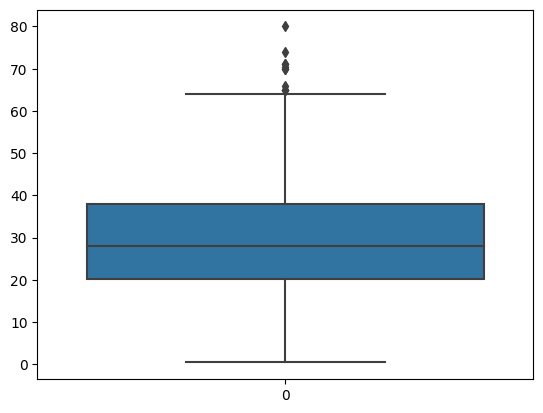

In [69]:
sns.boxplot(df["age"])

#Show the descriptive statistics of age and fare variables


In [70]:
df[["age","fare"]].describe().T      


,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#Visualize and examine the Age and Fare variables using a histogram method


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

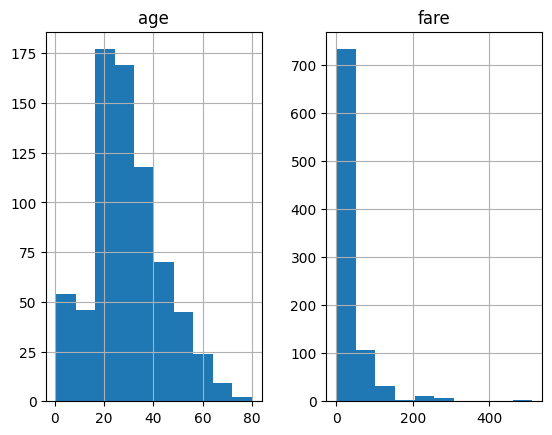

In [71]:
df[["age","fare"]].hist()

#Find how many classes are in the "Pclass" column and print the type of the variable. (you can use the Pandas.Series.unique() method to find how many classes the variable has)

In [72]:
df["pclass"].unique()

array([3, 1, 2])

In [73]:

df["pclass"].dtype

dtype('int64')

In [74]:

df["pclass"].nunique()

3

#Examine the dataset and create two different lists of categorical and numeric variables.
#The first list must have categorical variables.
#The second list must have numeric variables.


In [75]:
catch_cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
catch_num_cols = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
print(catch_cat_cols)
print(catch_num_cols)

['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
['survived', 'pclass', 'sibsp', 'parch']


#Show the number of survivors persons with a barplot.

<Axes: xlabel='survived', ylabel='survived'>

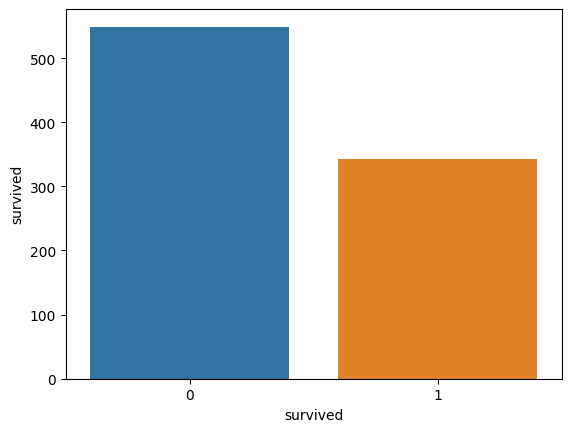

In [76]:
sns.barplot(data = df,
            x ="survived",
            y =df["survived"].value_counts(),
            )

# Show the survival rates of women and men.


In [77]:
df.groupby("sex")["survived"].mean().reset_index()

,sex,survived
0,female,0.742038
1,male,0.188908


#Show the Age, Class, and Embark Town values for men over 50 years old among passengers in the Cherbourg or Southampton area as a table. Assign the created table to a variable named df_new.

In [78]:
df["embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [79]:
df_new = df.loc[((df["embarked"] == "C") | (df["embarked"] == "S")) & ((df["sex"] == "male") & (df["age"] > 50))][["age","class","embark_town"]]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 6 to 857
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          44 non-null     float64 
 1   class        44 non-null     category
 2   embark_town  44 non-null     object  
dtypes: category(1), float64(1), object(1)
memory usage: 1.2+ KB


## Create a barplot using the df_new variable. Adjust the age variable parameters on the x-axis and the embark_town on the y-axis.

Text(0.5, 1.0, 'age - embark_town')

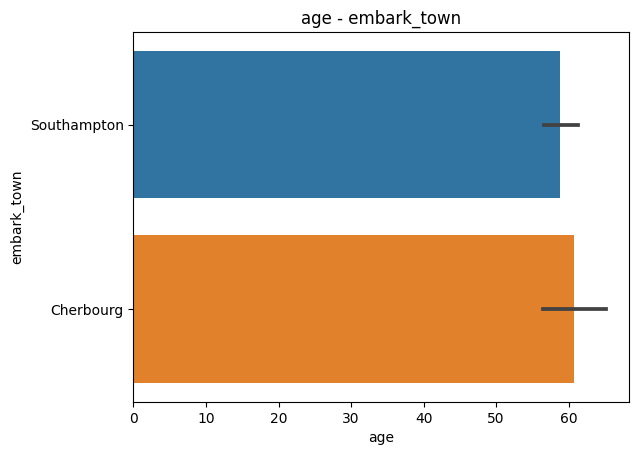

In [80]:
sns.barplot(data = df_new,
           x = "age",
           y = "embark_town")
plt.title("age - embark_town")

## Create the detect_outlier(df, features) function to find outlier values and clear them from the dataset.


In [81]:
from collections import Counter

In [82]:
def detect_outlier(df,features):
  outlier_indices = []

  for x in features:
    # first quartile
    q1 = np.percentile(df[x],25)
    # third quartile
    q3 = np.percentile(df[x],75)
    # IQR
    IQR = q3 - q1
    
    outlier_step = IQR * 1.5

    outliers_ = df[(df[x] < q1 - outlier_step) | (df[x] > q3 + outlier_step)].index

    outlier_indices.extend(outliers_)
    
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(key for key, value in outlier_indices.items() if value > 2)

  return multiple_outliers

#Clear outlier values of ["age", "mouse", "sibsp", "parch"] variables.

In [83]:
dropped_outlier = df.loc[detect_outlier(df, ["age", "fare", "sibsp", "parch"])]
dropped_outlier

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.00,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.00,S,First,woman,False,C,Southampton,yes,False
159,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
180,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
201,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
324,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
341,1,1,female,24.0,3,2,263.00,S,First,woman,False,C,Southampton,yes,False
792,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False
846,0,3,male,NaN,8,2,69.55,S,Third,man,True,NaN,Southampton,no,False
863,0,3,female,NaN,8,2,69.55,S,Third,woman,False,NaN,Southampton,no,False


In [84]:
df =df.drop(detect_outlier(df,["age", "fare", "sibsp", "parch"]), axis =0).reset_index(drop=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
877,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
878,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
879,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#Observe the missing values again. Fill in the missing values of embark variable with the value "C"

In [85]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            170
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           681
embark_town      2
alive            0
alone            0
dtype: int64

In [86]:
df["embarked"] = df["embarked"].fillna("C")

In [87]:
df["embarked"].isnull().sum()

0

In [88]:
correlation_list = ["age", "fare", "sibsp", "parch", "survived"]
correlation_list

['age', 'fare', 'sibsp', 'parch', 'survived']

<Axes: >

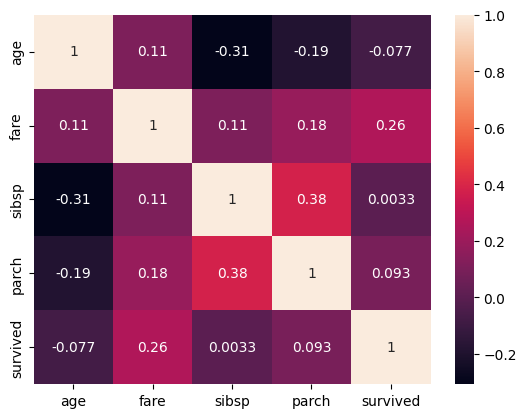

In [89]:
sns.heatmap(df[correlation_list].corr(), annot=True)

#Visualize and interpret using regplot() to see whether older passengers pay more or not
#Parameters should be arranged as follows.

#robust=True, ci=None


<Axes: xlabel='age', ylabel='fare'>

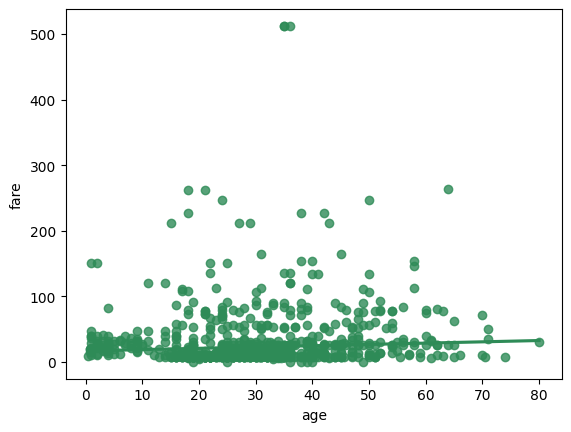

In [90]:
sns.regplot(x = "age", y ="fare", data=df, robust=True, ci=None, color="seagreen")

In [91]:
#DONE